# **SSCS - Training**

Developed by André Paiva

Based on SSCS Dataset created by Helena Cuesta and Emilia Gómez

## 1 - Initialization

In [ ]:
import numpy as np
import tensorflow as tf
import sscs
import matplotlib.pyplot as plt

## 2 - Download and extract dataset SSCS

In [ ]:
sscs.download()

## 3 - Training VoasCNN

In [ ]:
ds_train = sscs.get_dataset(split='train', end_index=1000)
ds_val = sscs.get_dataset(split='validate', end_index=300)
ds_test = sscs.get_dataset(split='test', end_index=300)

In [3]:
#ckpt_dir = './Checkpoints/mask_voas_treino1.keras'
#ckpt_dir = './Checkpoints/mask_voas_treino2_tracked.keras'
#ckpt_dir = './Checkpoints/mask_voas_treino3_tracked.keras'
ckpt_dir = './Checkpoints/mask_voas_treino4_tracked.keras'
mask_voas_cnn = sscs.mask_voas_cnn_model(l_rate = 5e-3)

#print(mask_voas_cnn.summary())

#sscs.load_weights(mask_voas_cnn, ckpt_dir=ckpt_dir)
sscs.train(mask_voas_cnn, ds_train, ds_val, epochs=30, save_model=True, ckpt_dir=ckpt_dir)  

Epoch 1/30


2023-07-01 20:42:27.904119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:434] Loaded cuDNN version 8600
2023-07-01 20:42:30.309681: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-01 20:42:31.756205: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1bd2b48990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-01 20:42:31.756322: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-07-01 20:42:31.810894: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-01 20:42:32.134184: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-01 20:42:32.230697: I ./tensorflow/compiler/jit/device_c

   2751/Unknown - 387s 134ms/step - loss: 0.0486 - tf.compat.v1.squeeze_loss: 0.0113 - tf.compat.v1.squeeze_1_loss: 0.0131 - tf.compat.v1.squeeze_2_loss: 0.0131 - tf.compat.v1.squeeze_3_loss: 0.0110

2023-07-01 20:48:46.704797: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11387148806814260465
2023-07-01 20:48:46.704849: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16682637239040157345
2023-07-01 20:48:46.704860: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13127324588026530400



Epoch 1: saving model to ./Checkpoints/mask_voas_treino4_tracked.keras
2751/2751 [==============================] - 482s 169ms/step - loss: 0.0486 - tf.compat.v1.squeeze_loss: 0.0113 - tf.compat.v1.squeeze_1_loss: 0.0131 - tf.compat.v1.squeeze_2_loss: 0.0131 - tf.compat.v1.squeeze_3_loss: 0.0110 - val_loss: 0.0379 - val_tf.compat.v1.squeeze_loss: 0.0084 - val_tf.compat.v1.squeeze_1_loss: 0.0105 - val_tf.compat.v1.squeeze_2_loss: 0.0106 - val_tf.compat.v1.squeeze_3_loss: 0.0084
Epoch 2/30
2751/2751 [==============================] - ETA: 0s - loss: 0.0385 - tf.compat.v1.squeeze_loss: 0.0083 - tf.compat.v1.squeeze_1_loss: 0.0109 - tf.compat.v1.squeeze_2_loss: 0.0108 - tf.compat.v1.squeeze_3_loss: 0.0084
Epoch 2: saving model to ./Checkpoints/mask_voas_treino4_tracked.keras
2751/2751 [==============================] - 474s 172ms/step - loss: 0.0385 - tf.compat.v1.squeeze_loss: 0.0083 - tf.compat.v1.squeeze_1_loss: 0.0109 - tf.compat.v1.squeeze_2_loss: 0.0108 - tf.compat.v1.squeeze_3_loss

In [ ]:
ckpt_dir = './Checkpoints/downsample_voas_cnn.keras'
downsample_voas_cnn = sscs.downsample_voas_cnn_model()

#print(mask_voas_cnn.summary())

#sscs.load_weights(downsample_voas_cnn)
#sscs.train(downsample_voas_cnn, ds_train, ds_val, epochs=30, save_model=False, ckpt_dir=ckpt_dir)  

## 4 - Evaluation with F-Score

In [4]:
songs = sscs.pick_songlist(amount=300, split='test')

def multivoice_f_score(song):
    mix, s, a, t, b = sscs.read_all_voice_splits(song)
    s_pred, a_pred, t_pred, b_pred = mask_voas_cnn.predict(mix)

    mix = np.moveaxis(mix, 0, 1).reshape(360, -1)
    s = np.moveaxis(s, 0, 1).reshape(360, -1)
    a = np.moveaxis(a, 0, 1).reshape(360, -1)
    t = np.moveaxis(t, 0, 1).reshape(360, -1)
    b = np.moveaxis(b, 0, 1).reshape(360, -1)

    s_pred_postproc = sscs.prediction_postproc(s_pred).astype(np.float32)
    a_pred_postproc = sscs.prediction_postproc(a_pred).astype(np.float32)
    t_pred_postproc = sscs.prediction_postproc(t_pred).astype(np.float32)
    b_pred_postproc = sscs.prediction_postproc(b_pred).astype(np.float32)
    mix_pred_postproc = s_pred_postproc + a_pred_postproc + t_pred_postproc + b_pred_postproc
    mix_pred_postproc = sscs.vectorized_downsample_limit(mix_pred_postproc)

    s_fscore = sscs.f_score(s, s_pred_postproc)
    a_fscore = sscs.f_score(a, a_pred_postproc)
    t_fscore = sscs.f_score(t, t_pred_postproc)
    b_fscore = sscs.f_score(b, b_pred_postproc)

    return [s_fscore, a_fscore, t_fscore, b_fscore]

f_scores = np.array(list(map(multivoice_f_score, songs)))
f_scores = f_scores.T
np.save('./Evaluation_Data/f-scores_treino4_tracked.npy', f_scores)

(pid=46874) 2023-07-02 00:29:58.610674: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7630] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=46874) 2023-07-02 00:29:58.610779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=46874) 2023-07-02 00:29:58.610877: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1500] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=46874) 2023-07-02 00:29:58.693321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(pid=46874) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compil

11/11 [==============================] - 1s 114ms/step


(raylet) [2023-07-02 00:40:10,378 E 46812 46812] (raylet) node_manager.cc:3069: 3 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: 5e3a82f1d19dfc027b23d091666f03fe3e5cf0b5be4f6a675ff24272, IP: 172.22.39.131) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 172.22.39.131`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


1/1 [==============================] - 0s 20ms/step


In [ ]:
#f_scores = np.load('./Evaluation_Data/f-scores_treino3_tracked.npy')

In [5]:
f_scores.shape

(4, 300)

In [6]:
s_counts, s_bins = np.histogram(f_scores[0], bins=100)
a_counts, a_bins = np.histogram(f_scores[1], bins=100)
t_counts, t_bins = np.histogram(f_scores[2], bins=100)
b_counts, b_bins = np.histogram(f_scores[3], bins=100)

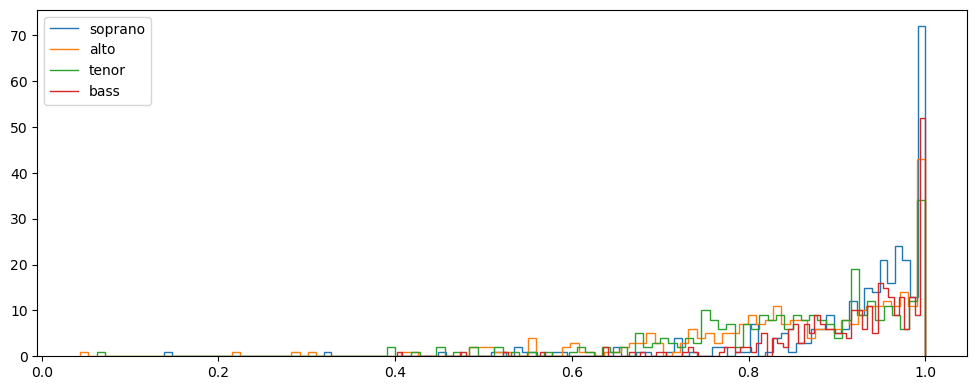

In [7]:
plt.figure(figsize=(12,4.5))
plt.stairs(s_counts, s_bins, label='soprano')
plt.stairs(a_counts, a_bins, label='alto')
plt.stairs(t_counts, t_bins, label='tenor')
plt.stairs(b_counts, b_bins, label='bass')
plt.legend()
plt.show()

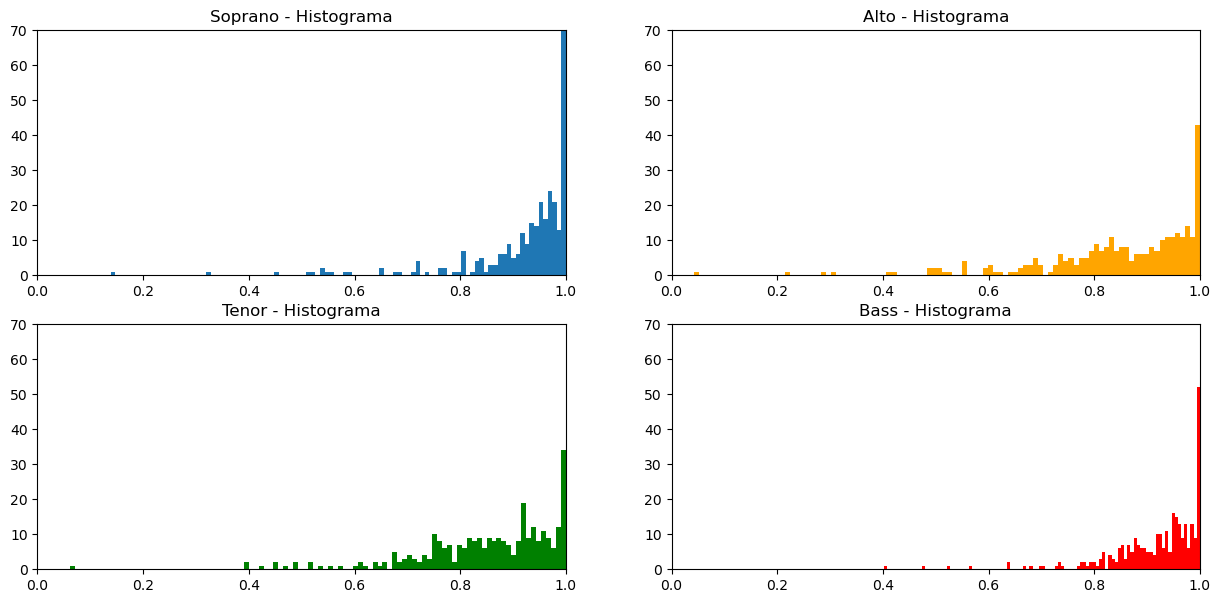

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
axs[0][0].stairs(s_counts, s_bins, fill=True)
axs[0][0].set_title("Soprano - Histograma")
axs[0][0].set_xlim([0, 1])
axs[0][0].set_ylim([0, 70])

axs[0][1].stairs(a_counts, a_bins, fill=True, color='orange')
axs[0][1].set_title("Alto - Histograma")
axs[0][1].set_xlim([0, 1])
axs[0][1].set_ylim([0, 70])

axs[1][0].stairs(t_counts, t_bins, fill=True, color='green')
axs[1][0].set_title("Tenor - Histograma")
axs[1][0].set_xlim([0, 1])
axs[1][0].set_ylim([0, 70])

axs[1][1].stairs(b_counts, b_bins, fill=True, color='red')
axs[1][1].set_title("Bass - Histograma")
axs[1][1].set_xlim([0, 1])
axs[1][1].set_ylim([0, 70])

plt.show()

In [9]:
def boxplot(f_score_array):    
    fig, ax = plt.subplots(figsize=(4, 5))
    ax.boxplot(f_score_array.T)
    ax.set_ylim([0, 1])
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)

    print(np.median(f_score_array[0]), np.median(f_score_array[1]),
          np.median(f_score_array[2]), np.median(f_score_array[3]))

    plt.show()

In [10]:
f_scr1 = np.load("./Evaluation_Data/f-scores_treino1.npy")
f_scr2 = np.load("./Evaluation_Data/f-scores_treino2_tracked.npy")
f_scr3 = np.load("./Evaluation_Data/f-scores_treino3_tracked.npy")
f_scr4 = np.load("./Evaluation_Data/f-scores_treino4_tracked.npy")

0.9557955200295666 0.8877555095408922 0.8796407407425293 0.941631396379784


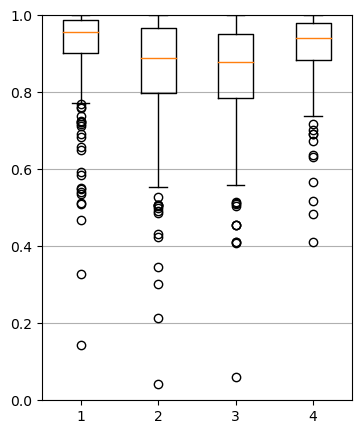

0.957410596232581 0.8927647707720616 0.8726177014909005 0.9331590105945149


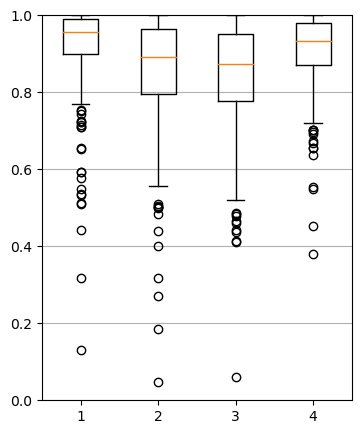

0.9568291525862096 0.8871839491155689 0.8696288562500029 0.934310202302143


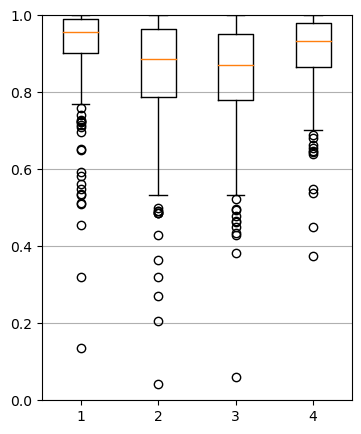

0.9549946081196607 0.8847639870934988 0.8751952625000028 0.9411902525184301


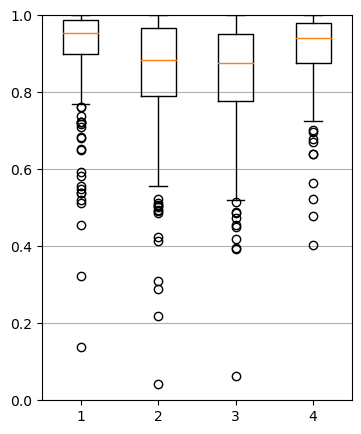

In [11]:
boxplot(f_scr1)
boxplot(f_scr2)
boxplot(f_scr3)
boxplot(f_scr4)

## 5 - Playground

1/1 [==============================] - 0s 47ms/step
F-Scores:
Soprano: 0.9884374500000024
Alto: 0.9345312000000027
Tenor: 0.9267187000000027
Bass: 0.9612499500000026



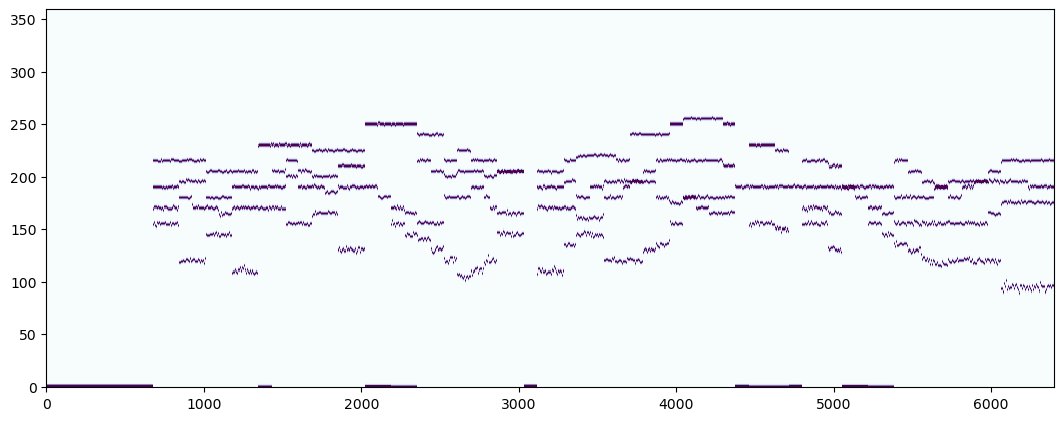

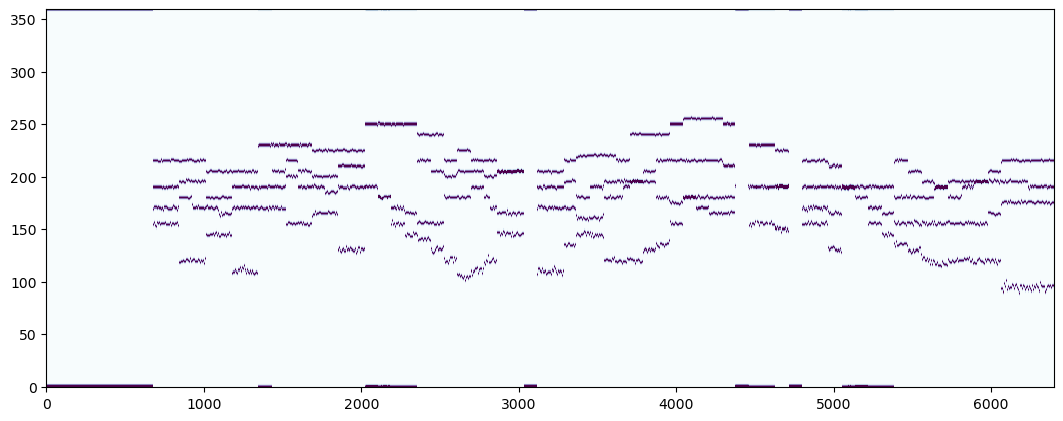

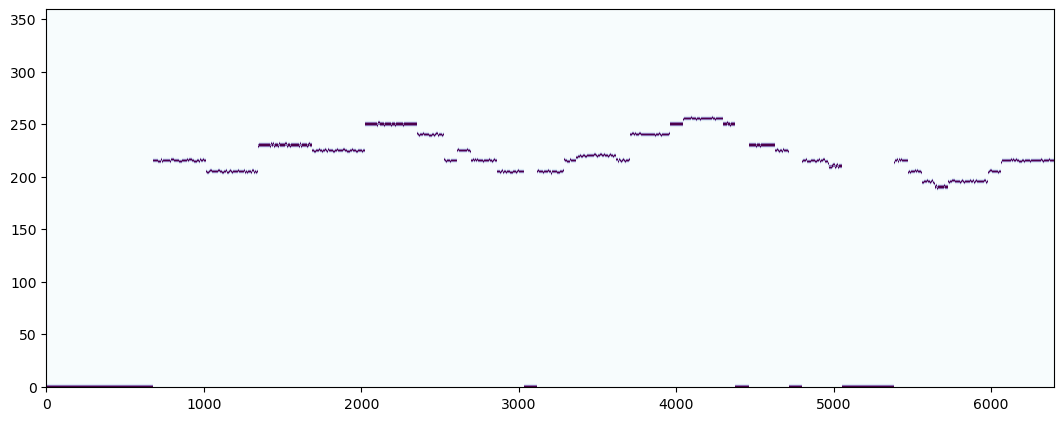

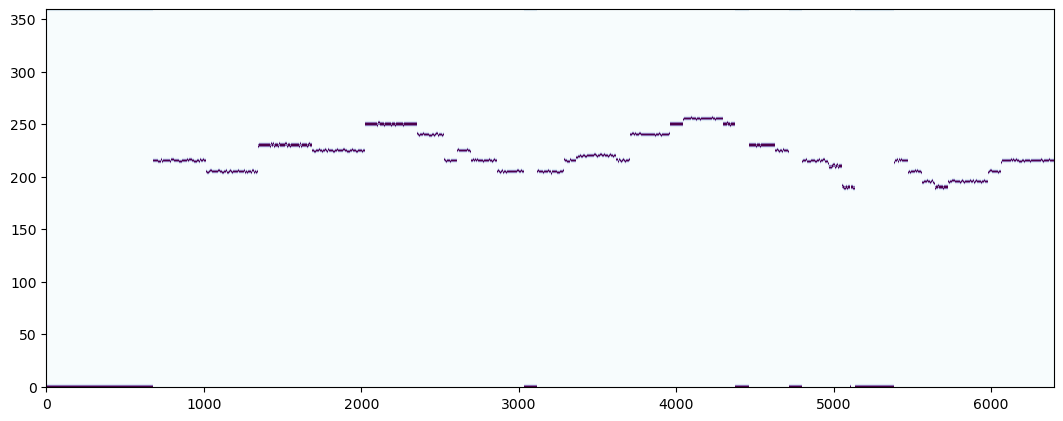

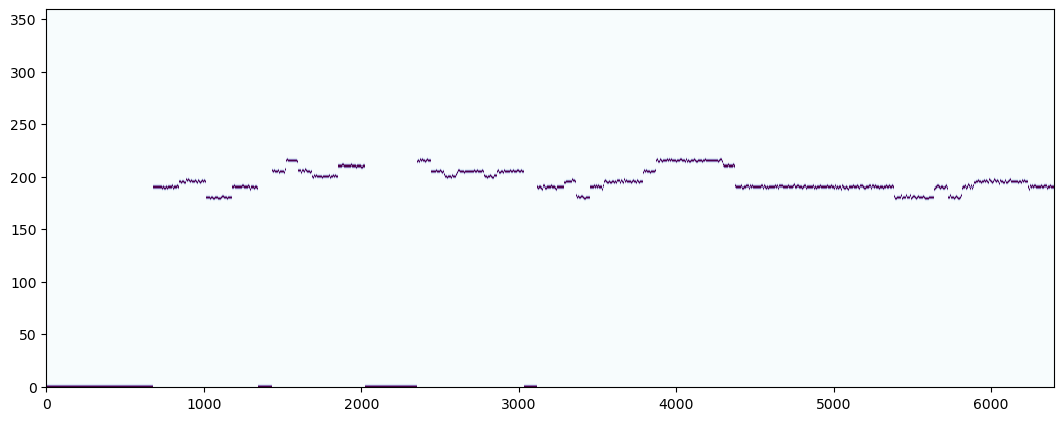

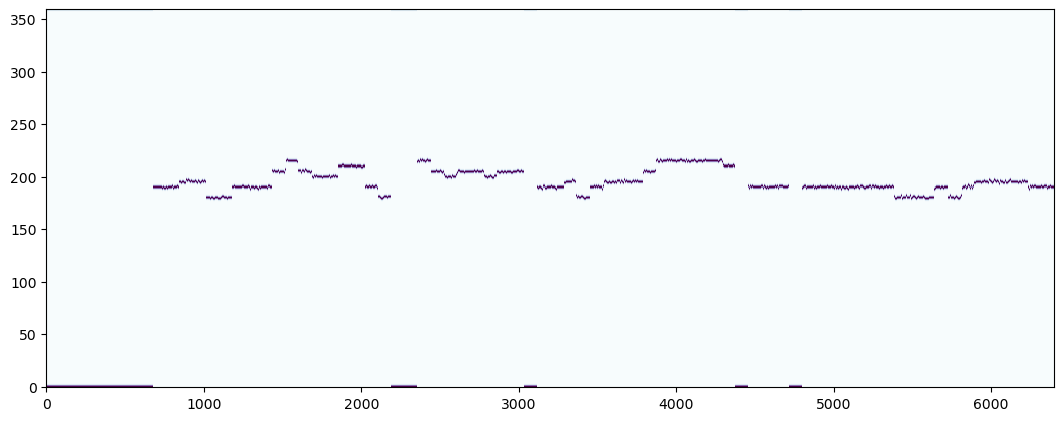

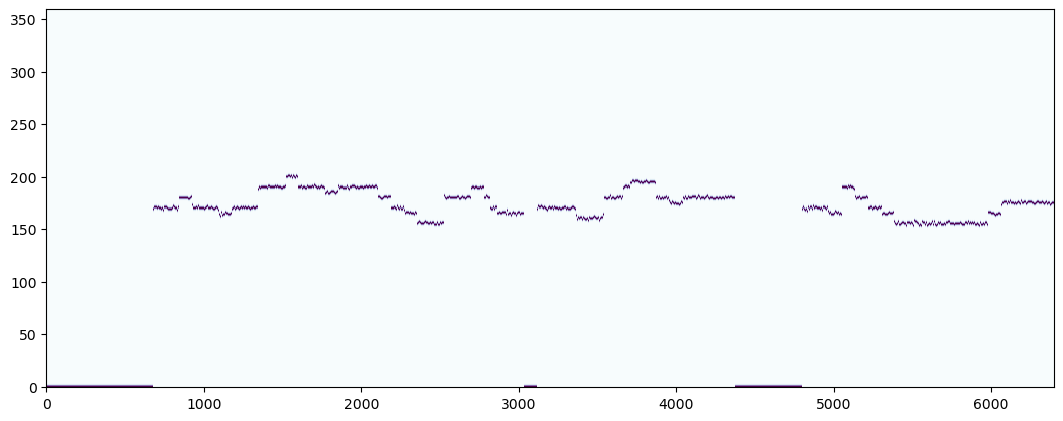

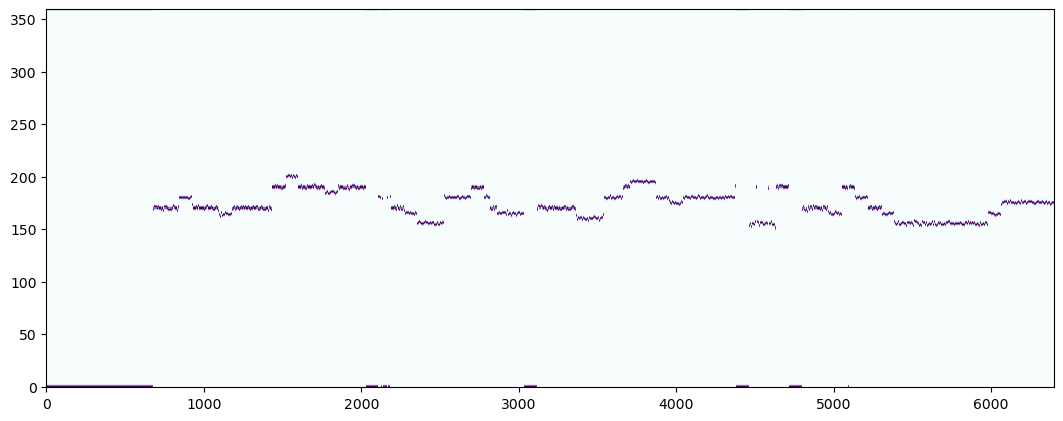

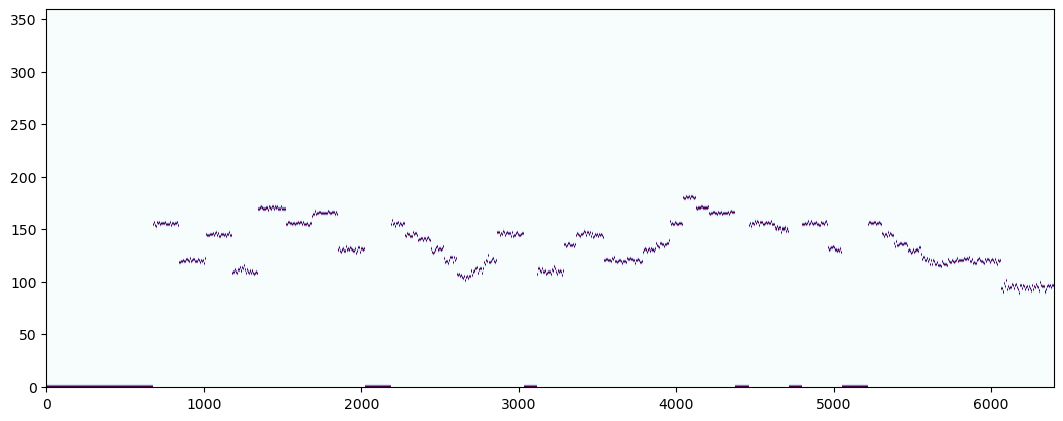

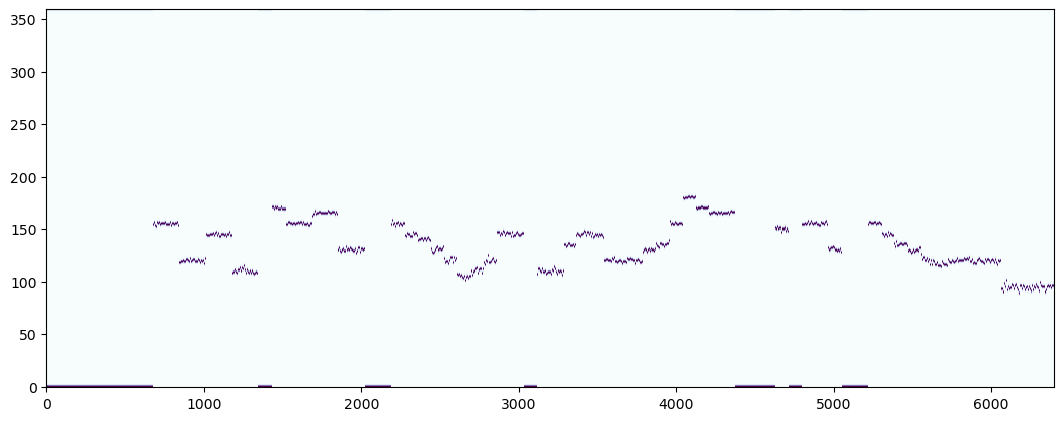

In [15]:
rand_song = sscs.pick_random_song(split='test')
mix, s, a, t, b = sscs.read_all_voice_splits(rand_song)

s_pred, a_pred, t_pred, b_pred = mask_voas_cnn.predict(mix)

mix = np.moveaxis(mix, 0, 1).reshape(360, -1)
s = np.moveaxis(s, 0, 1).reshape(360, -1)
a = np.moveaxis(a, 0, 1).reshape(360, -1)
t = np.moveaxis(t, 0, 1).reshape(360, -1)
b = np.moveaxis(b, 0, 1).reshape(360, -1)

s_pred_postproc = sscs.prediction_postproc(s_pred).astype(np.float32)
a_pred_postproc = sscs.prediction_postproc(a_pred).astype(np.float32)
t_pred_postproc = sscs.prediction_postproc(t_pred).astype(np.float32)
b_pred_postproc = sscs.prediction_postproc(b_pred).astype(np.float32)
mix_pred_postproc = s_pred_postproc + a_pred_postproc + t_pred_postproc + b_pred_postproc
mix_pred_postproc = sscs.vectorized_downsample_limit(mix_pred_postproc)

s_fscore = sscs.f_score(s, s_pred_postproc)
a_fscore = sscs.f_score(a, a_pred_postproc)
t_fscore = sscs.f_score(t, t_pred_postproc)
b_fscore = sscs.f_score(b, b_pred_postproc)

print("F-Scores:")
print(f"Soprano: {s_fscore}")
print(f"Alto: {a_fscore}")
print(f"Tenor: {t_fscore}")
print(f"Bass: {b_fscore}")
print()

sscs.plot(mix)
sscs.plot(mix_pred_postproc)

sscs.plot(s)
sscs.plot(s_pred_postproc)

sscs.plot(a)
sscs.plot(a_pred_postproc)

sscs.plot(t)
sscs.plot(t_pred_postproc)

sscs.plot(b)
sscs.plot(b_pred_postproc)

sscs.song_to_midi(s, a, t, b, './MIDI/original.mid')
sscs.song_to_midi(s_pred_postproc, a_pred_postproc, t_pred_postproc, b_pred_postproc,
                  './MIDI/predicted.mid')